#                            __Credit Card Customers Analysis__

# Business Problem Statement 

A bank manager is uncomfortable with more and more customers leaving their credit card services. They would really appreciate it if someone could predict who will be affected so that they can proactively go to the customer to provide them with better services and turn customer decisions in the opposite direction.

## Goal
<P>This project involves the analysis of Credit card customer dataset which contains the information about 10127 Customer transaction.
<P>With this dataset, we have to make a Classification ML model to predict the Attrition customer.

## Data description

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account

2. Customer_Age: Demographic variable - Customer's Age in Years

3. Gender: Demographic variable - M=Male, F=Female

4. Dependent_count: Demographic variable - Number of dependents

5. Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

6. Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

7. Income_Category: Demographic variable - Annual Income Category of the account holder 

8. Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

9. Months_on_book: Period of relationship with bank

10. Total_Relationship_Count: Total no. of products held by the customer

11. Months_Inactive_12_mon: No. of months inactive in the last 12 months

12. Contacts_Count_12_mon: No. of Contacts in the last 12 months

13. Credit_Limit: Credit Limit on the Credit Card

14. Total_Revolving_Bal: Total Revolving Balance on the Credit Card

15. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

16. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)

18. Total_Trans_Ct: Total Transaction Count (Last 12 months)

19. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

20. Avg_Utilization_Ratio: Average Card Utilization Ratio

## IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text
from scipy.stats import chi2_contingency
import scipy.stats 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  roc_auc_score
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

## Importing Data
we will import our data and exclude our last 2 features and __CLIENTNUM__ feature (As it is a unique identifier in our dataset).

In [2]:
df = pd.read_csv("BankChurners.csv")
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                      , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','CLIENTNUM'], inplace = True)

## CLEANING and PREPROCESSING

In [3]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
df.shape

(10127, 20)

In [6]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


As we can see there are no missing value and no duplicate rows in our dataset.

# EXPLORATORY DATA ANALYSIS

<p>Before EDA we first divide our dataset into Numerical (In Numerical we sub-divide into Discrete and Continuous feature) and Categorial feature. 
<p> As we can do group wise analysis of our dataset.

In [8]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O' ]
print("Number of Numerical feature:",len(numerical_feature))

Number of Numerical feature: 14


In [9]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Number of Discrete feature:",len(discrete_feature))

Number of Discrete feature: 4


In [10]:
df[discrete_feature].nunique()

Dependent_count             6
Total_Relationship_Count    6
Months_Inactive_12_mon      7
Contacts_Count_12_mon       7
dtype: int64

In [11]:
continuous_feature =[feature for feature in numerical_feature if feature not in discrete_feature]
print("Number of Continuous feature:",len(continuous_feature))

Number of Continuous feature: 10


In [12]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O' ]
print("Number of categorical feature:",len(categorical_feature))

Number of categorical feature: 6


So,we have 14 Numerical Feature and 6 Categorical feature. Now, let's start our analysis

## ANALYSIS OF CONTINOUS  AND DISCRETE FEATURES

For this we will plot histogram to see the distribution of of our continuous feature.

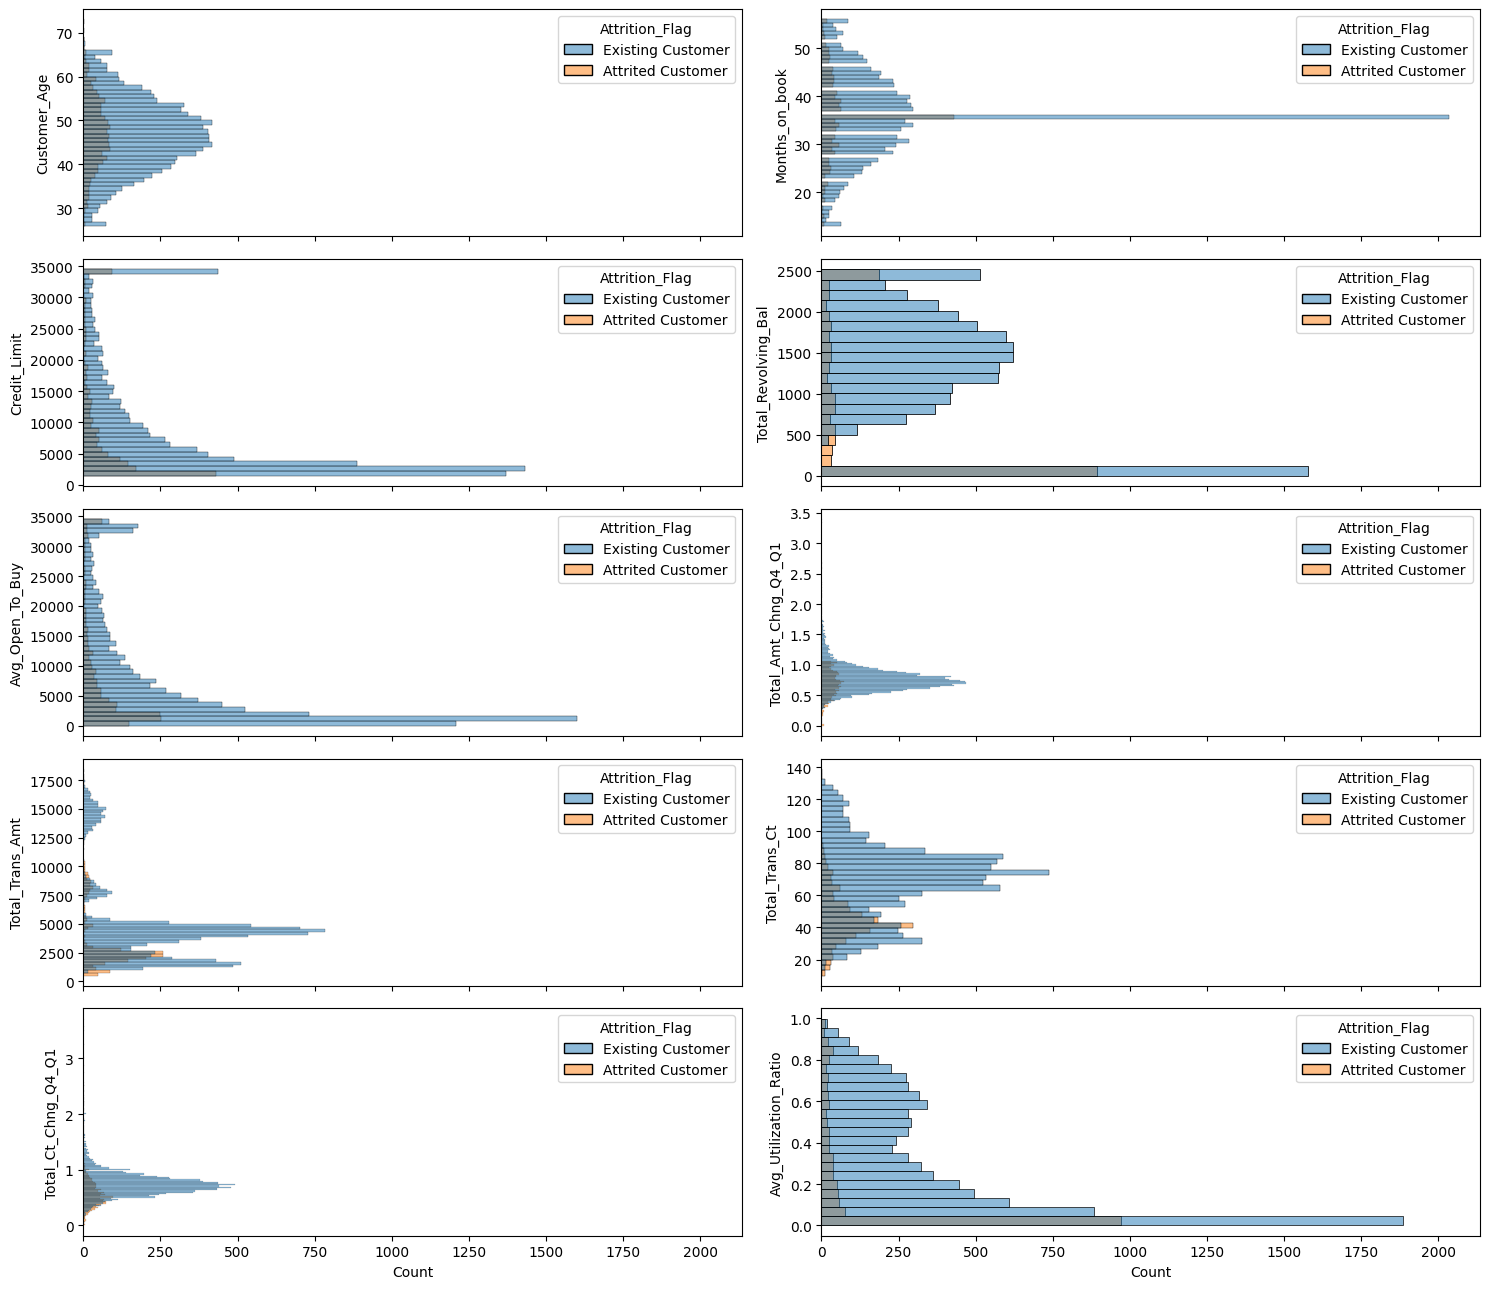

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(15,13), sharex=True)
axes=axes.flatten()
for ax, catplot in zip(axes, continuous_feature):
    sns.histplot(y=catplot, data=df, ax=ax, hue = "Attrition_Flag")

plt.tight_layout()  
plt.show()

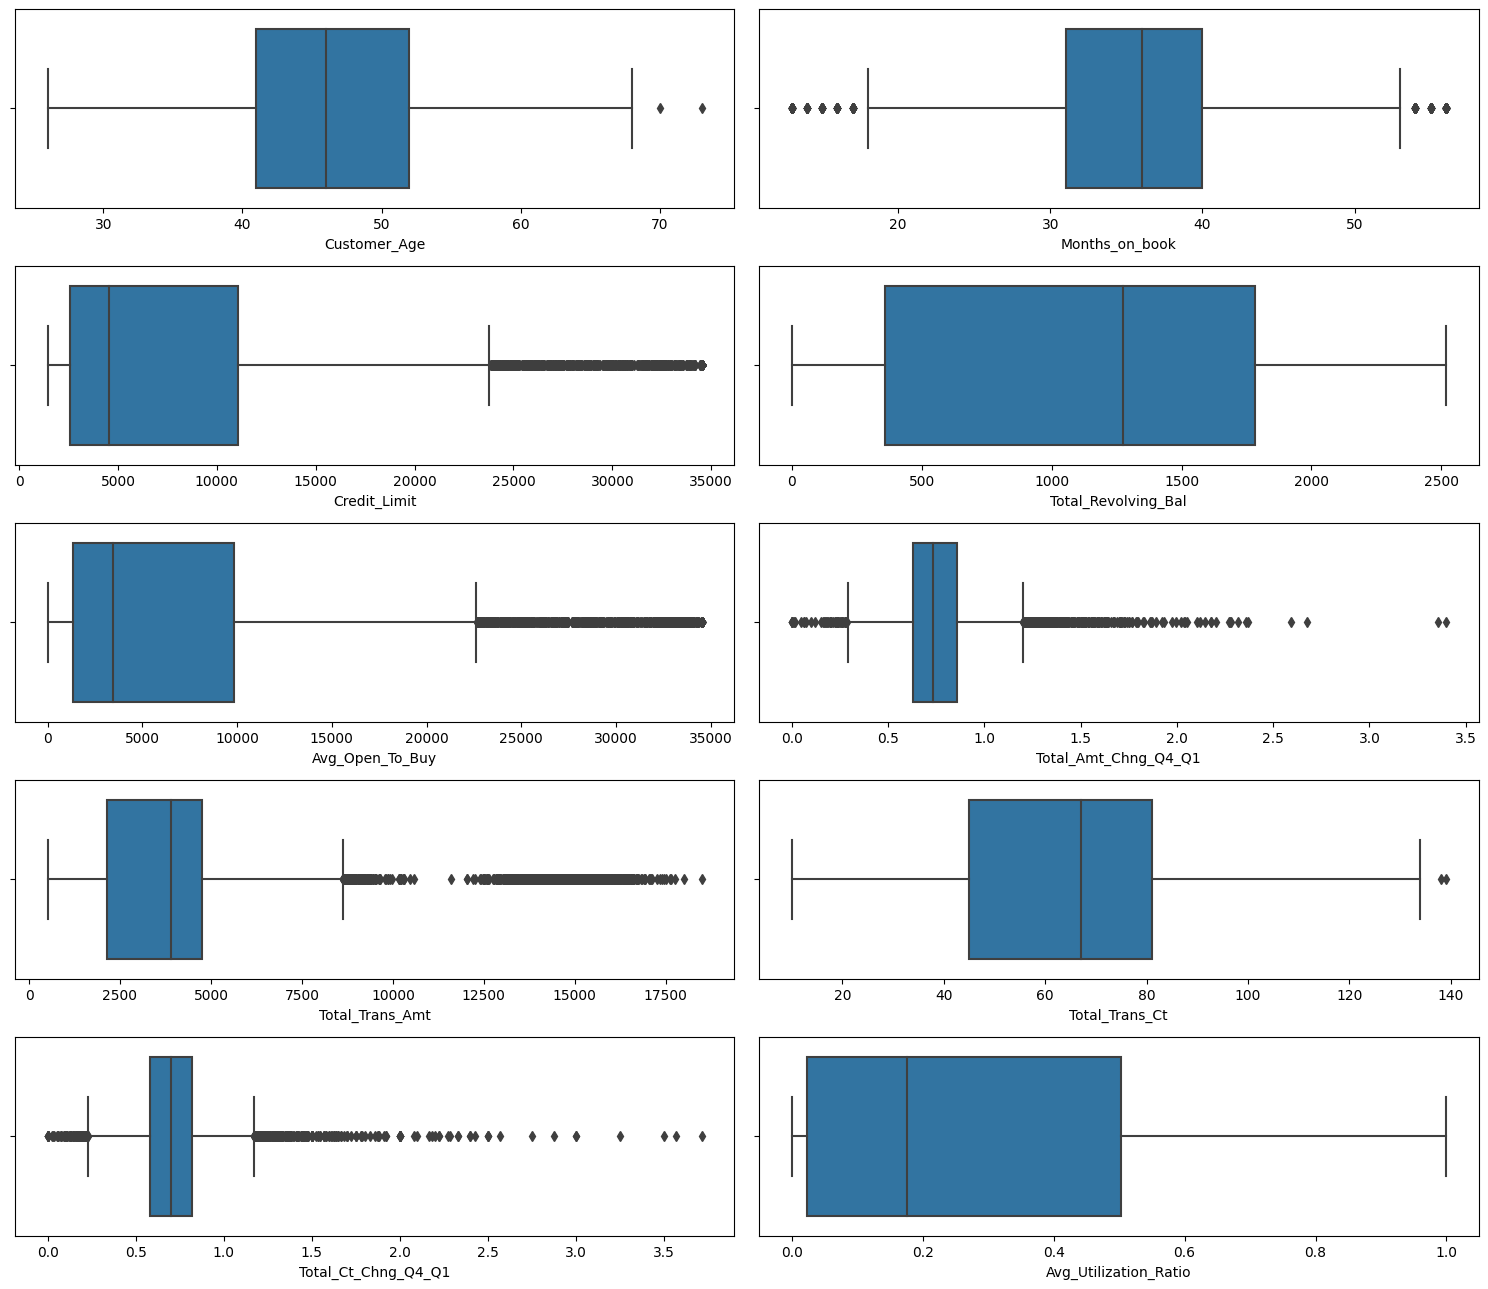

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(15,13))
axes=axes.flatten()
for ax, catplot in zip(axes, continuous_feature):
    sns.boxplot(x=catplot, data=df, ax=ax)

plt.tight_layout()  
plt.show()

As our Continuous feature are very skewed.Now let's take a look on discrete feature


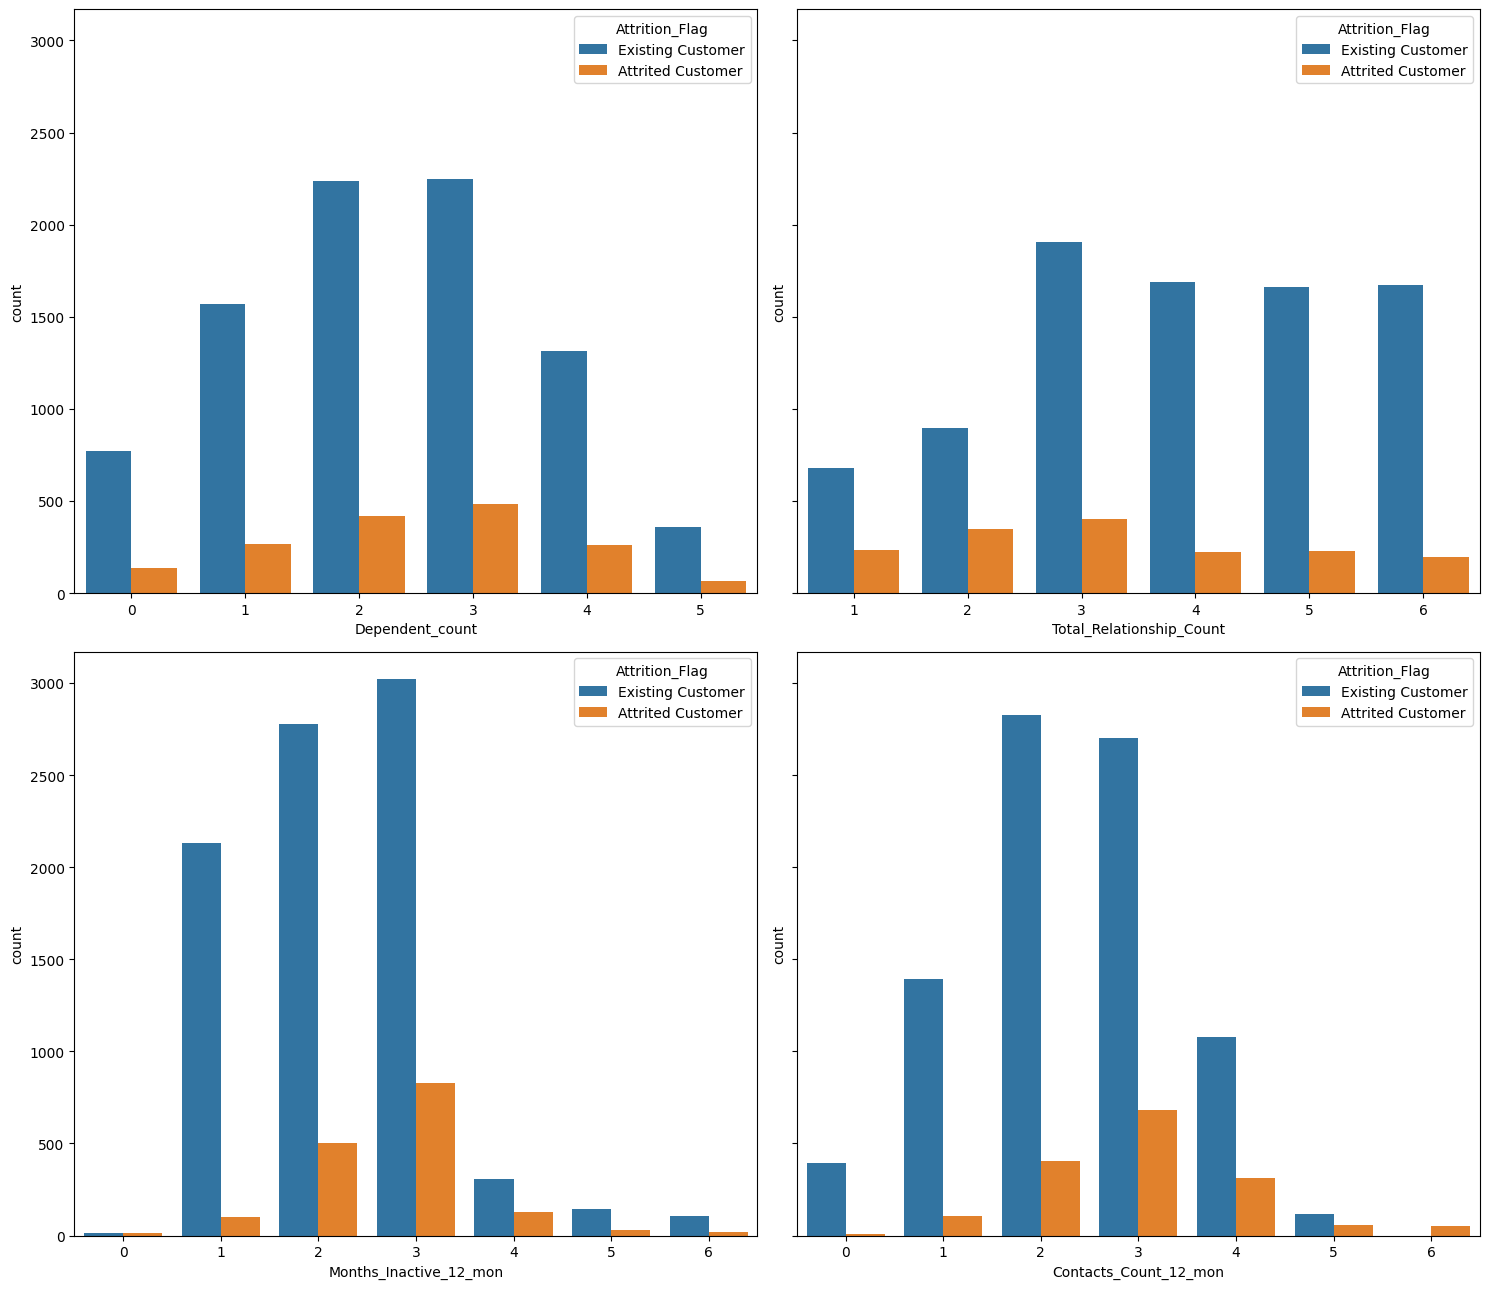

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,13), sharey=True)
axes = axes.flatten()
for ax, catplot in zip(axes, discrete_feature):
    sns.countplot(x=catplot, data=df, ax=ax, hue = "Attrition_Flag")

plt.tight_layout()  
plt.show()

## ANALYSIS OF CATEGORICAL FEATURES


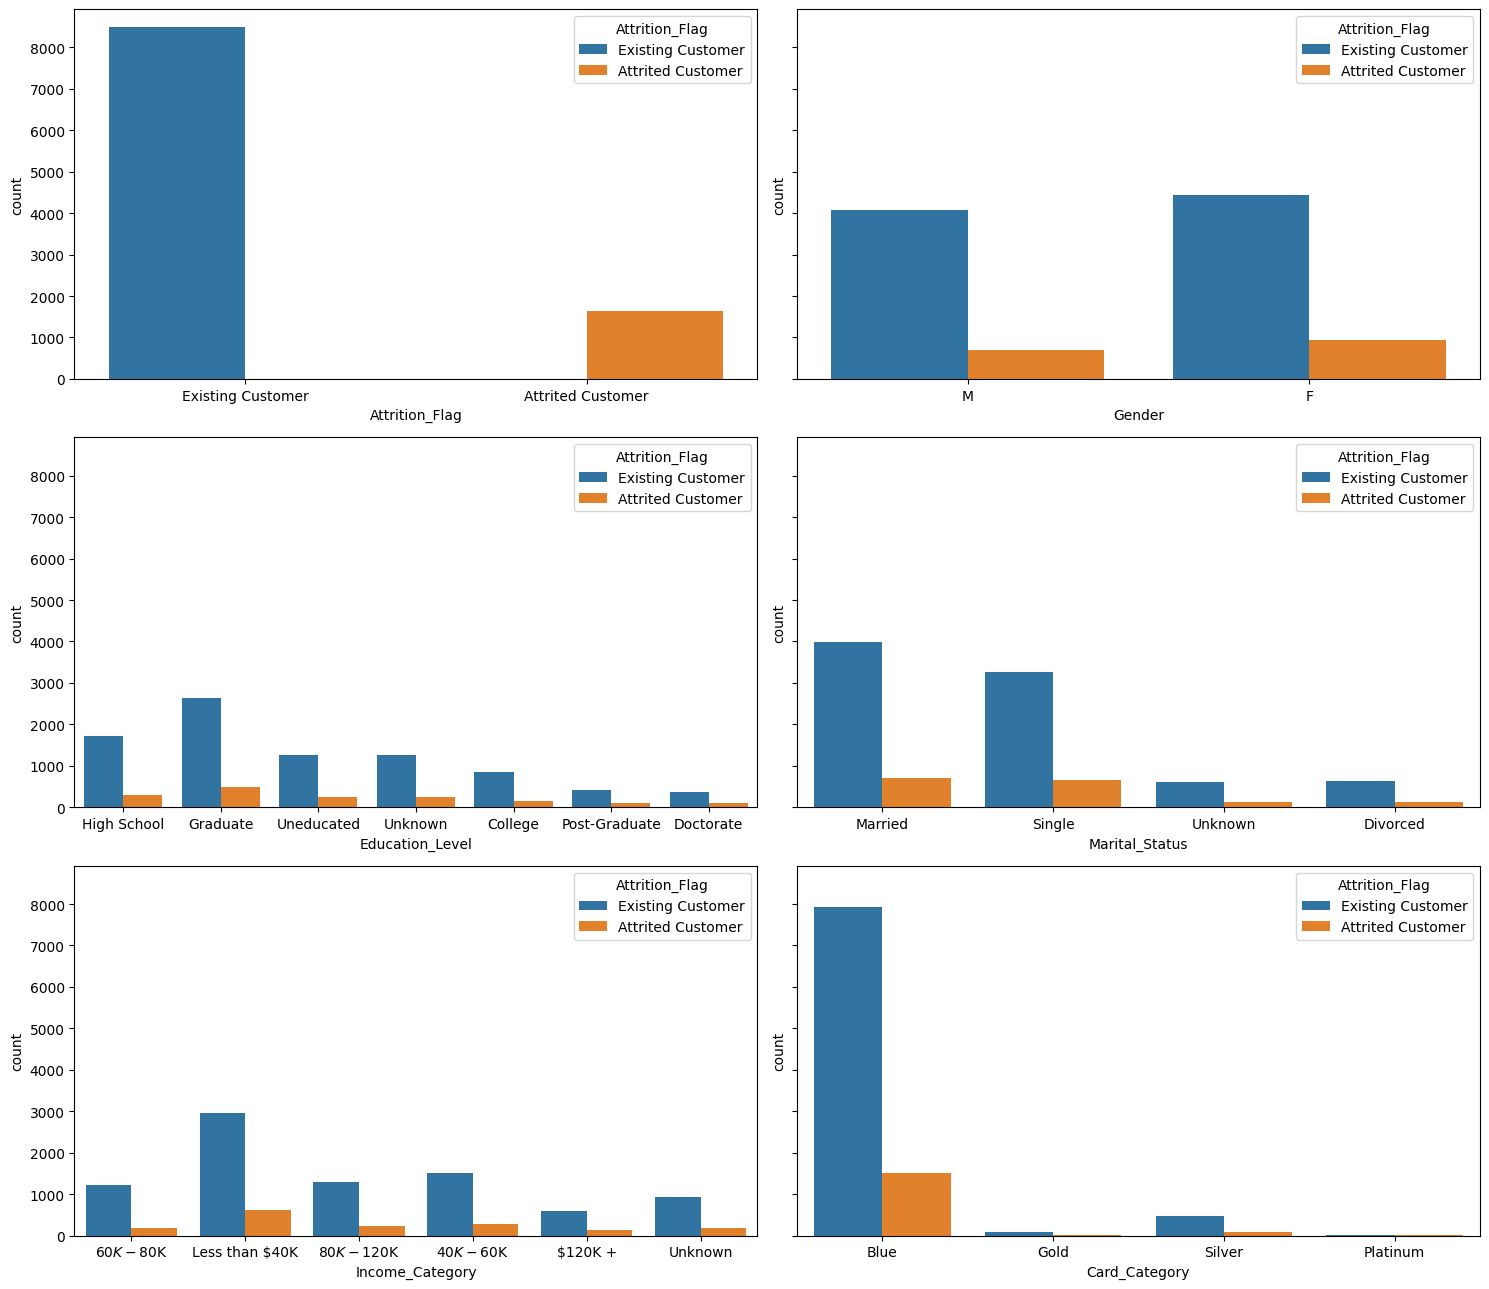

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15,13), sharey=True)
axes=axes.flatten()
for ax, catplot in zip(axes, categorical_feature):
    sns.countplot(x=catplot, data=df, ax=ax, hue = "Attrition_Flag") 
plt.tight_layout()  
plt.show()

#### Obervation we get from this:
1. As People are getting more educated, they are less likely to use credit card and their attrition count are also getting decreased.
2. People having income less than 40k have significantly higher attrition count.
3. People having Blue Credit are also having significantly higher attrition count.
4. Also our dataset is also imbalanced as Existing customer are much higher than Attrited customer, we will deal with this problem later in our study.

# STATISTICAL ANALYSIS

#### <p1>Now let's see how each features affect one another in our dataset.
        For this we will apply some statistical test:
        1. For Analysing categorical to categorical feature relationship, we will use Chi-squared test.
        2. For Analysis categorical to Numerical feature relationship, we will use One way anova.

## Chi squared test of independence

In [17]:
for feature in categorical_feature: 
    contigency= pd.crosstab(df[feature], df['Attrition_Flag']) 
    c, p, dof, expected = chi2_contingency(contigency) 
    print("{} and Attrition flag P value is {}".format(feature,p))

Attrition_Flag and Attrition flag P value is 0.0
Gender and Attrition flag P value is 0.00019635846717310307
Education_Level and Attrition flag P value is 0.05148913147336634
Marital_Status and Attrition flag P value is 0.10891263394840227
Income_Category and Attrition flag P value is 0.025002425704390617
Card_Category and Attrition flag P value is 0.5252382797994759


<p>For Gender and Income category P<0.05, then we reject our null hypothesis that Gender and attrition flag are independent. SO, Gender and Attrition are depend on each other.
<p> For Education level, marital Status and card category P>0.05, then we accept our null hypothesis that Card_Category and attrition flag are independent

## Anova Test

In [18]:
a = (df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1}))

In [19]:
def calculateAnova(numVariable, catVariable=a):
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] 
    groupNumVariableByCatVariable0 = numVariable[catVariable==0]
    # Calculate one way anova
    fValue, pValue = scipy.stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) 
    return f"Anova Result between {numVariable.name} & {catVariable.name}: f=> {fValue}, p=> {pValue}"

In [20]:
for feature in numerical_feature:
    print(calculateAnova(df[feature]))

Anova Result between Customer_Age & Attrition_Flag: f=> 3.356073855250133, p=> 0.0669868850168818
Anova Result between Dependent_count & Attrition_Flag: f=> 3.6528251909948493, p=> 0.05600239253443362
Anova Result between Months_on_book & Attrition_Flag: f=> 1.8970705665886505, p=> 0.1684370287633549
Anova Result between Total_Relationship_Count & Attrition_Flag: f=> 233.07288587630802, p=> 4.829281002128081e-52
Anova Result between Months_Inactive_12_mon & Attrition_Flag: f=> 240.9103763025699, p=> 1.0326639995812652e-53
Anova Result between Contacts_Count_12_mon & Attrition_Flag: f=> 441.8680500969009, p=> 4.697489630696143e-96
Anova Result between Credit_Limit & Attrition_Flag: f=> 5.773729372945391, p=> 0.016285357205197453
Anova Result between Total_Revolving_Bal & Attrition_Flag: f=> 752.7024081839684, p=> 6.630148455338936e-160
Anova Result between Avg_Open_To_Buy & Attrition_Flag: f=> 0.0008228504895646497, p=> 0.9771160894377175
Anova Result between Total_Amt_Chng_Q4_Q1 & Attr

<p>Since p>0.05, we can say that Attrition chance is not statistically associated with customer Age, Months_Inactive_12_mon, Dependent_count, Avg_Open_To_Buy.
<p>For other feature which has p < 0.05 we state that we have a main interaction effect. This simply means that amongst the groups at least any of the group(or groups) means statistically significantly differ from one another

In [21]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

## HEATMAP 

Now we will see features are correlated to one another.

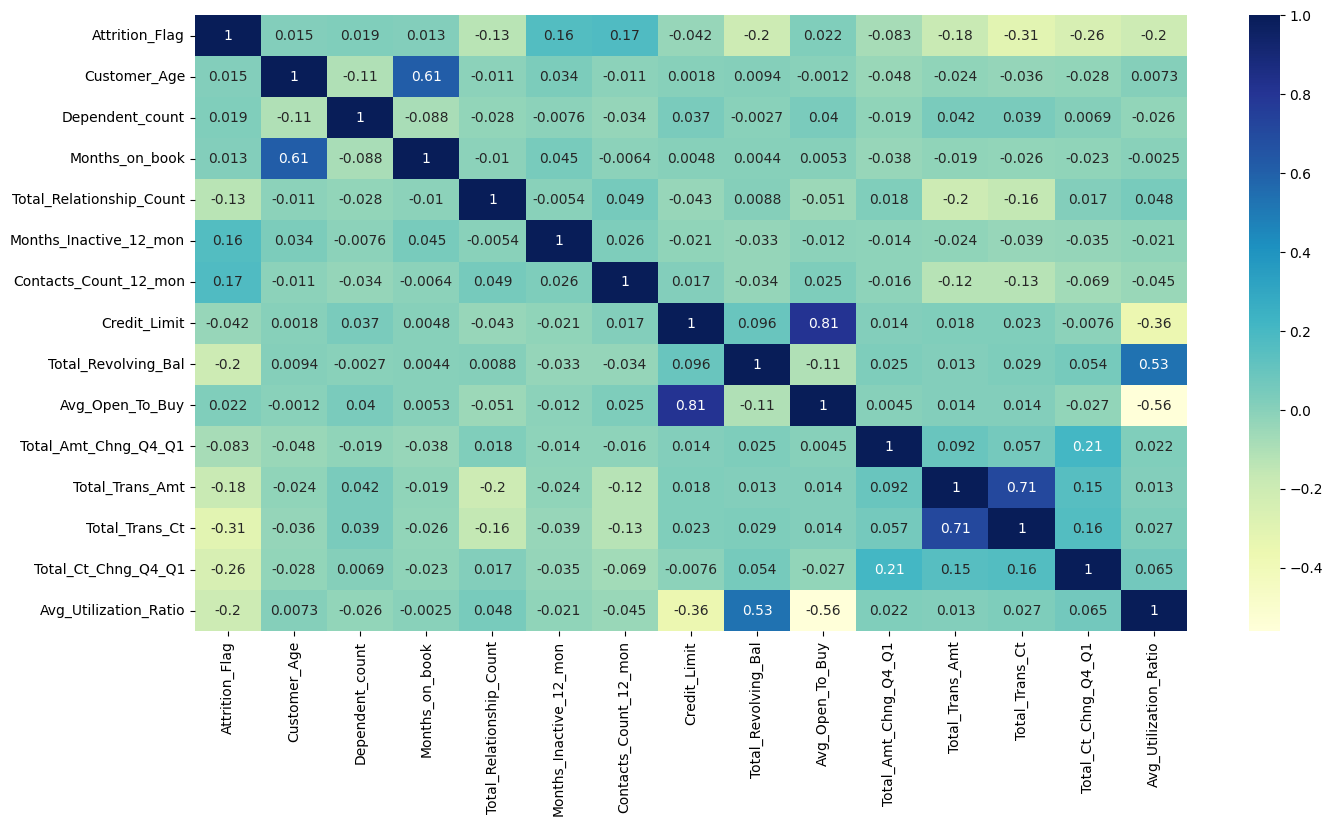

In [22]:
correlation = df.corr(method='kendall')

plt.figure(figsize = [16,8])
sns.heatmap(correlation, cmap="YlGnBu",annot = True)

plt.show()

From this heatmap, we can conclude that Total_tran_Ct and Total_Ct_chng_4_1 features are most correlated to Attrition Flag and some features are correlated to each other but no correlation excede 70% threshold.So, we don't remove any features

## Feature ENGINEERING

#### <p>Now let's convert our Categorical features in numerical features.
#### <p>In this case we will use one hot encoding

In [23]:
categorical_cols = list(df.select_dtypes("object"))

In [24]:
for feature in categorical_cols:
    dummy_feature = pd.get_dummies(df[feature], drop_first=True, prefix=feature)
    df = pd.concat([df,dummy_feature],axis=1)
    df.drop(columns=feature, inplace=True)

In [25]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0


## SPLITTING ARE DATASET IN TRAINING AND TESTING DATA

We will divide are dataset in 20% for testing and 80% for training.

In [26]:
y = df.pop("Attrition_Flag")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

## NORMALISING THE DATA 

In [28]:

scaler = MinMaxScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

## SMOTE 

As our dataset is imbalanced to fix this issue we will use oversampling to get 50-50% Attrited and Existing Customer.

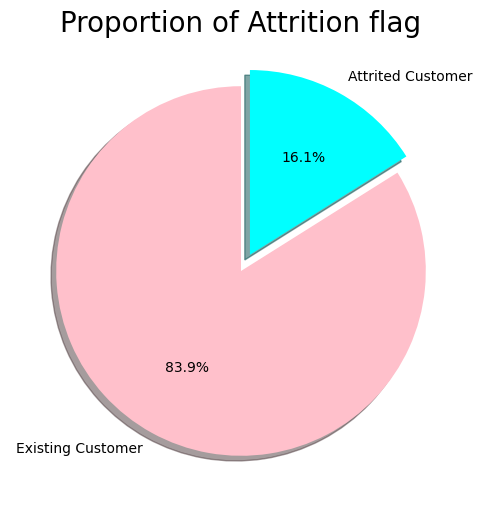

In [29]:
plt.figure(figsize = (6, 6))
plt.pie(y.value_counts(), labels = ['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', 
        explode = (0, 0.1), shadow = True, startangle = 90, colors = ['pink', 'cyan'])
plt.title('Proportion of Attrition flag', fontsize = 20)
plt.show()

In [30]:

sm = SMOTE(random_state = 69, sampling_strategy = 1.0)
                     
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_scaled_smote, y_scaled_smote = sm.fit_resample(X_scaled_train, y_train)

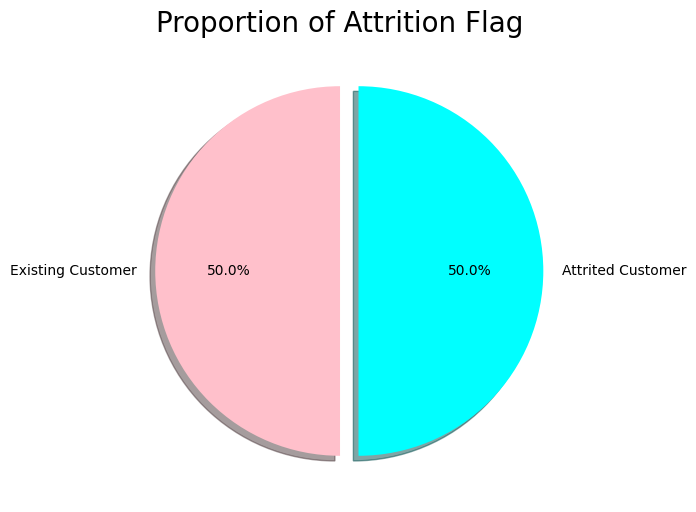

In [31]:
plt.figure(figsize = (6, 6))
plt.pie(y_smote.value_counts(), labels = ['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', 
        explode = (0, 0.1), shadow = True, startangle = 90, colors = ['pink', 'cyan'])
plt.title('Proportion of Attrition Flag', fontsize = 20)
plt.show()

We have store Smote features in Normalised dataset and Without Normalised dataset as some ML algorithm work better without Normalising. 

#### Now our Dataset is ready for applying Modelling.

# MODELLING

For Modelling our Dataset, we will apply 4 ML Model(Logistic regression, Decision Tree,KNN, Random Forest) and evaluating which one is performing well.

## LOGISTIC REGRESSION

We are using logistic regression model to classify Attrited customer.For now we will see which parameters are performing best. 

In [32]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [33]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_scaled_smote, y_scaled_smote)

In [34]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873479 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.872817 (0.010453) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.872817 (0.010453) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.872792 (0.010423) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.873258 (0.010108) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873258 (0.010108) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873087 (0.010154) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.873479 (0.010105) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873479 (0.010105) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.873283 (0.009968) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.860622 (0.009414) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860622 (0.009414) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860499 (0.008504) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.816844 (0.009410) wit

Now,We have got best parameter we will use them to make our model.

In [35]:
logreg = LogisticRegression(C= 1.0, penalty = 'l2', solver = 'newton-cg', random_state=42)
logreg.fit(X_scaled_smote, y_scaled_smote)
y_pred_test = logreg.predict(X_scaled_test)

In [36]:


cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1468  240]
 [  55  263]]

True Positives(TP) =  1468

True Negatives(TN) =  263

False Positives(FP) =  240

False Negatives(FN) =  55


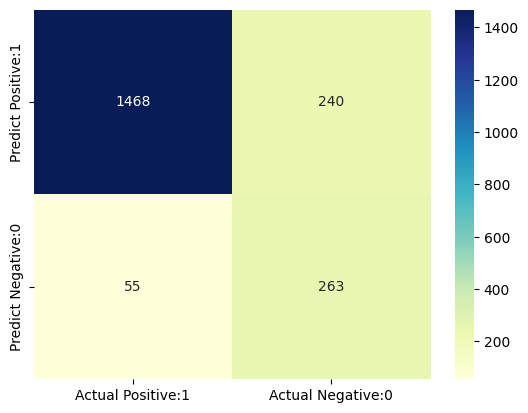

In [37]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1708
           1       0.52      0.83      0.64       318

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.87      2026



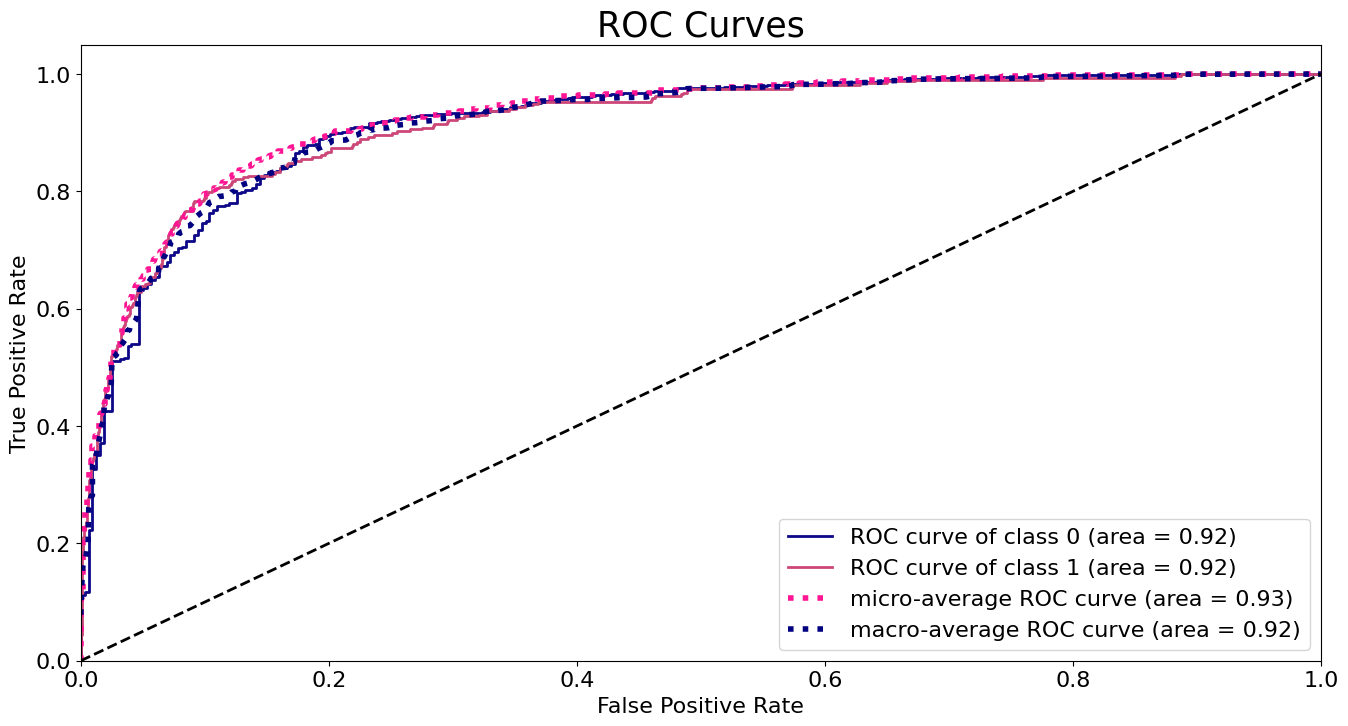

In [39]:
y_true = y_test 
y_probas = logreg.predict_proba(X_scaled_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

After applying Logistic regression model we are getting accuracy 85%

## KNN

Now, we are using KNN model to classify Attrited customer.For now we will see which parameters are performing best. 

In [40]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_scaled_smote, y_scaled_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934630 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.919955 (0.005845) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.919955 (0.005845) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.882534 (0.006795) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.885380 (0.006655) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.857430 (0.008157) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.865700 (0.008055) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.840450 (0.009405) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.854437 (0.008919) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.828573 (0.009403) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.846977 (0.008584) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.820083 (

In [41]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')

In [42]:
knn.fit(X_scaled_smote, y_scaled_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [43]:
y_pred_test1 = knn.predict(X_scaled_test)

In [44]:
cm = confusion_matrix(y_test, y_pred_test1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1501  207]
 [ 143  175]]

True Positives(TP) =  1501

True Negatives(TN) =  175

False Positives(FP) =  207

False Negatives(FN) =  143


<AxesSubplot: >

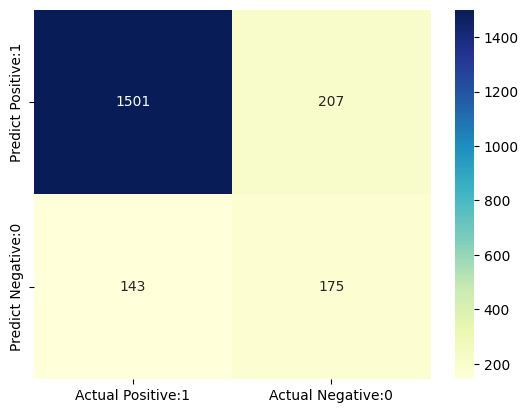

In [45]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [46]:
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1708
           1       0.46      0.55      0.50       318

    accuracy                           0.83      2026
   macro avg       0.69      0.71      0.70      2026
weighted avg       0.84      0.83      0.83      2026



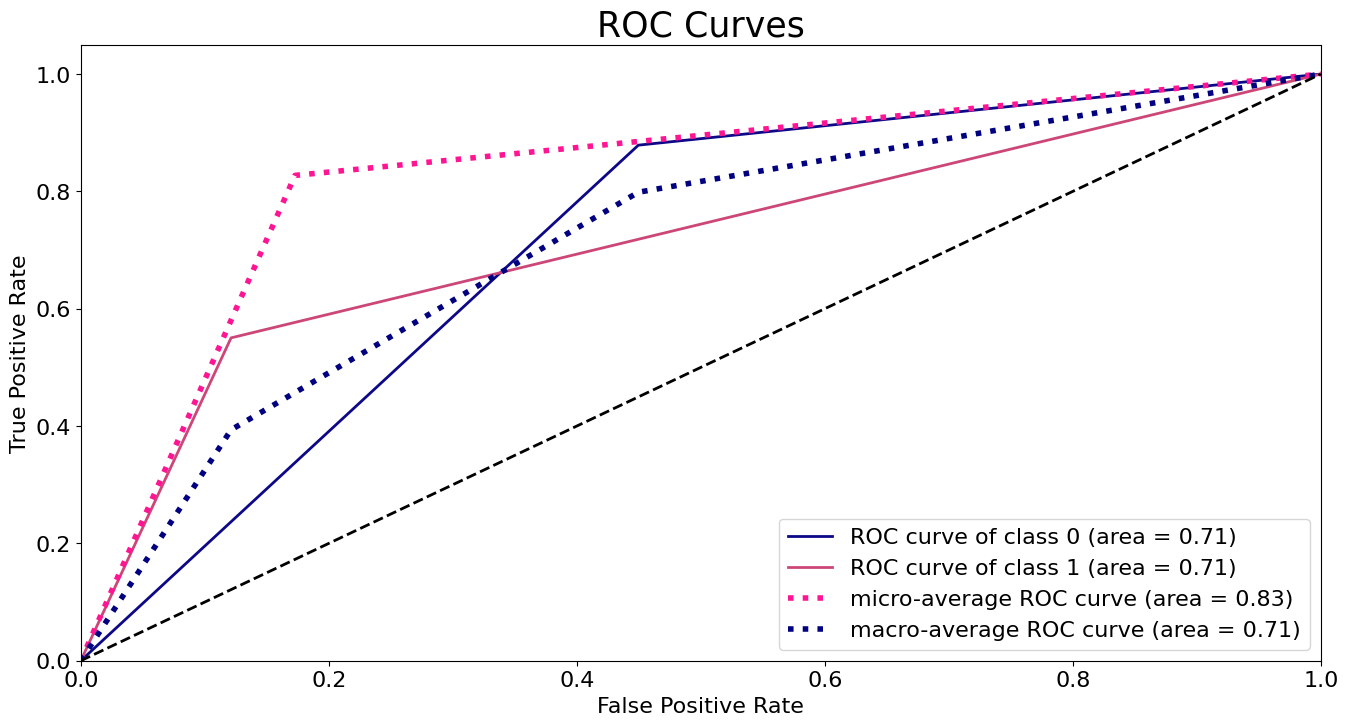

In [47]:
y_true = y_test 
y_probas = knn.predict_proba(X_scaled_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

These are the result that we are getting for KNN model

## DECISION TREE

Now, we will apply Decision Tree and evaluate the model.

In [48]:
dt_hp = DecisionTreeClassifier(random_state=43)

params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [49]:
grid_result = GS.fit(X_smote, y_smote)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best: 0.945010 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 18}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 16}
0.868448 (0.012467) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.868448 (0.012467) with: {'criterion': 'gi

In [50]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth = 15, min_samples_leaf = 5, min_samples_split = 16)

clf.fit(X_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=16)

In [51]:
y_pred_ent = clf.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_pred_ent)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1614   94]
 [  39  279]]


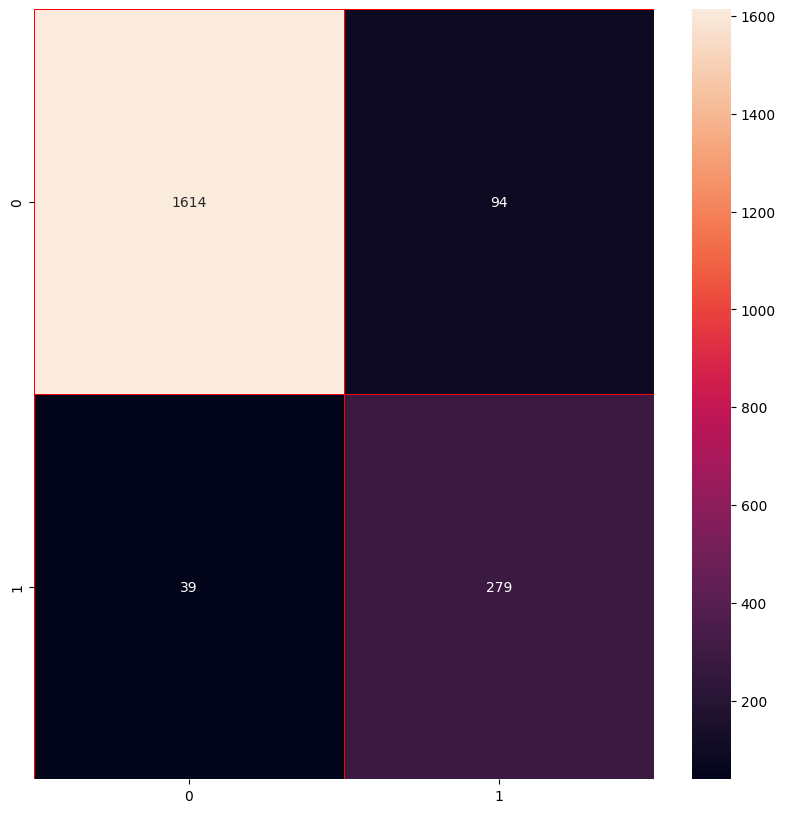

In [53]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [54]:
print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1708
           1       0.75      0.88      0.81       318

    accuracy                           0.93      2026
   macro avg       0.86      0.91      0.88      2026
weighted avg       0.94      0.93      0.94      2026



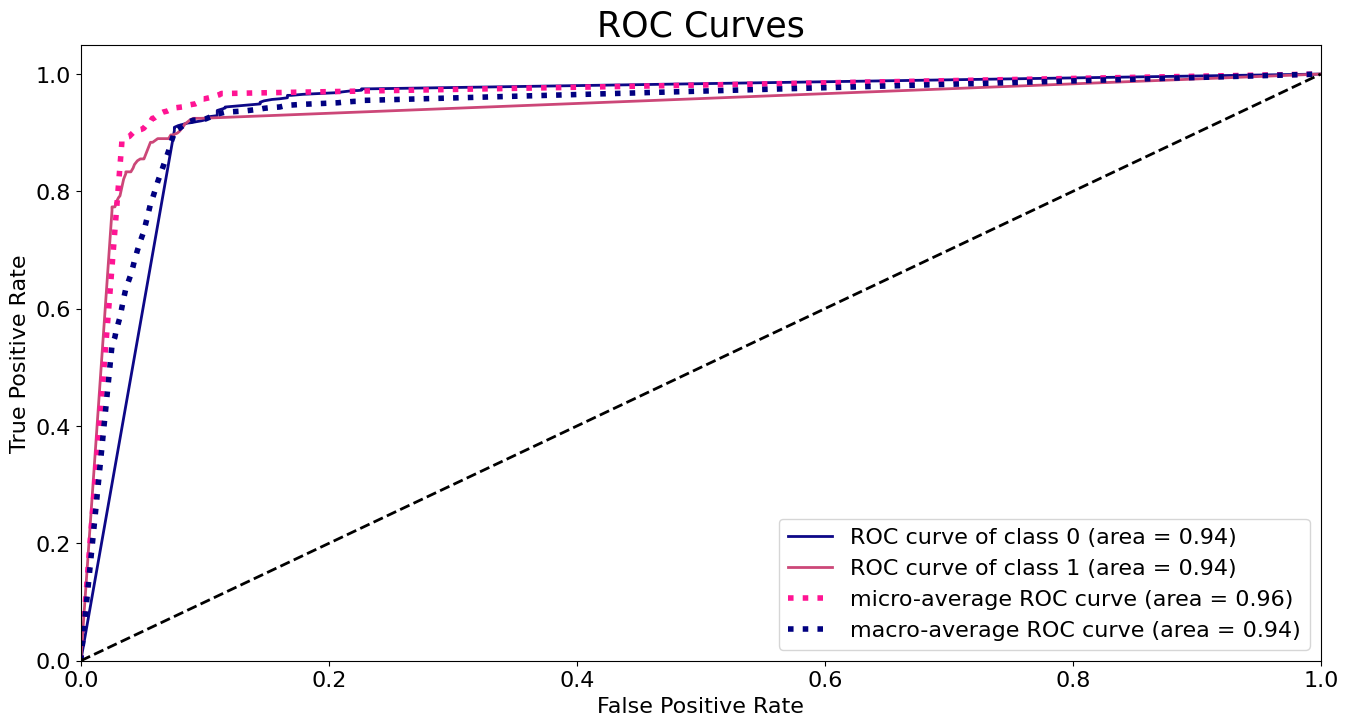

In [55]:
y_true = y_test 
y_probas = clf.predict_proba(X_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

For decision Tree model we are getting accuracy of 93% 

## Random FOREST

And for our last model we will apply Random Forest and evaluate it performance

In [56]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_smote, y_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978676 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.969400 (0.004283) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.978210 (0.004209) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.978676 (0.004065) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.969400 (0.005430) with: {'max_features': 'log2', 'n_estimators': 10}
0.978627 (0.003440) with: {'max_features': 'log2', 'n_estimators': 100}
0.978651 (0.004102) with: {'max_features': 'log2', 'n_estimators': 1000}


In [57]:
rf = RandomForestClassifier(max_features ='sqrt', n_estimators= 1000, random_state=42)

rf.fit(X_smote, y_smote)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [58]:
y_pred = rf.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1661   47]
 [  53  265]]


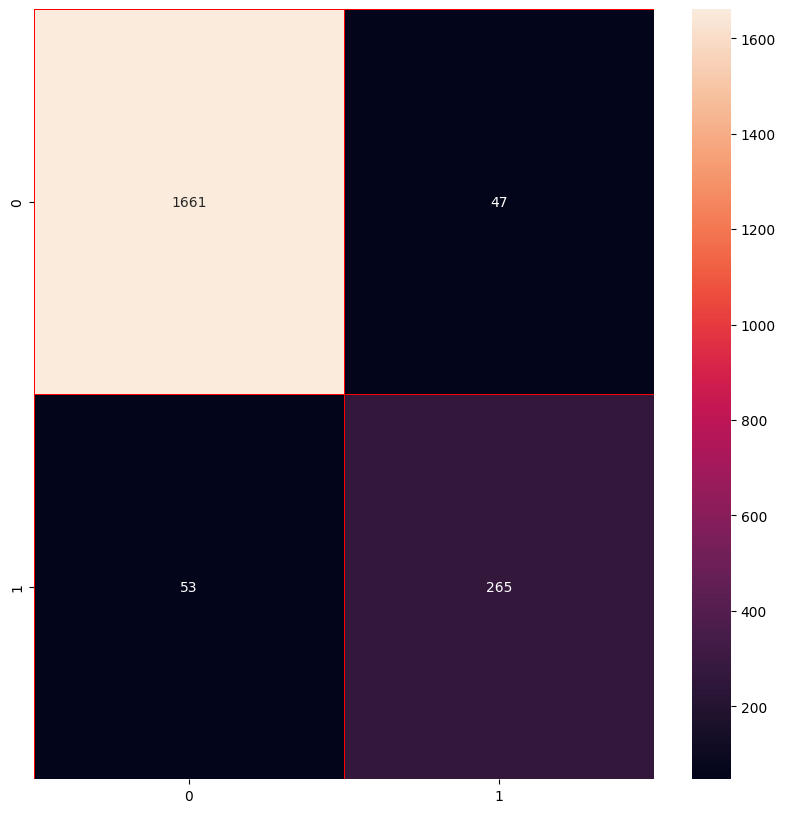

In [60]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1708
           1       0.85      0.83      0.84       318

    accuracy                           0.95      2026
   macro avg       0.91      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026



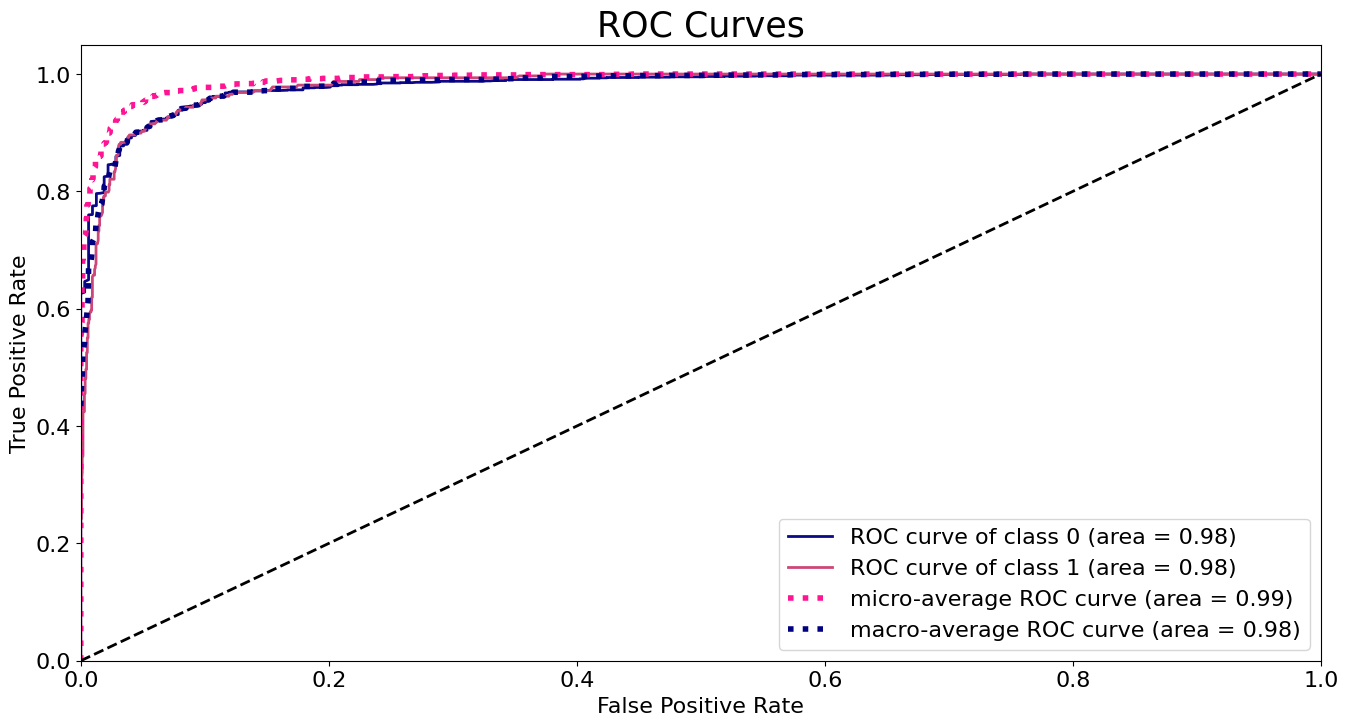

In [62]:
y_true = y_test 
y_probas = rf.predict_proba(X_test) 

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
plt.grid(False)
plt.show()

For Random Forest model we are getting accuracy of 95% 

## SVC

Atlast we will apply SVC and evaluate the model.

In [63]:
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(X_smote, y_smote)

SVC(random_state=0)

In [64]:
y_pred_svc = classifier.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred_svc)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1251  457]
 [  88  230]]


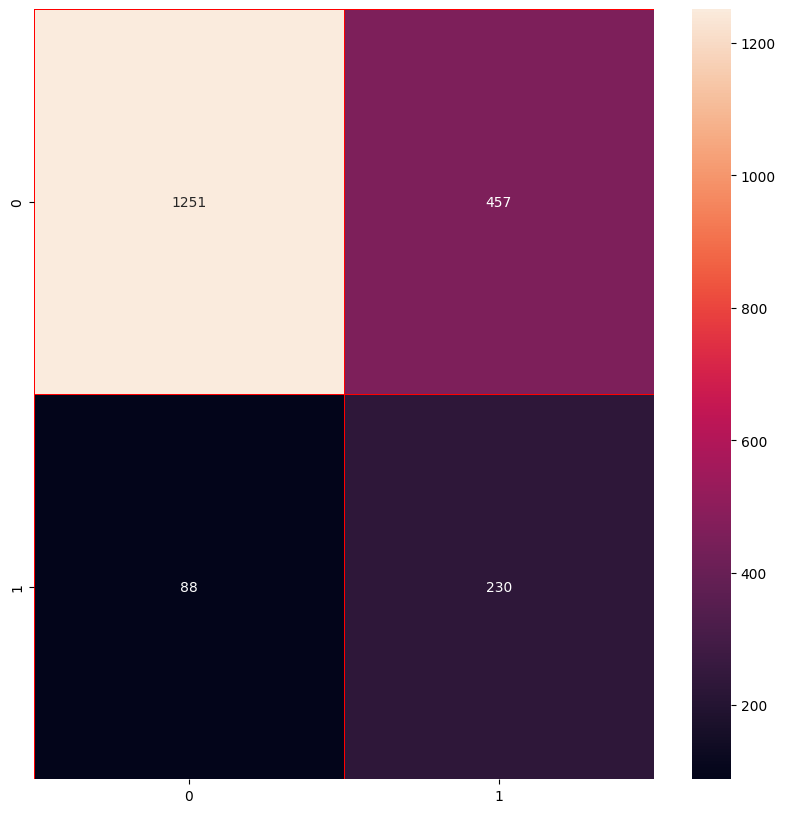

In [66]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

In [67]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1708
           1       0.33      0.72      0.46       318

    accuracy                           0.73      2026
   macro avg       0.63      0.73      0.64      2026
weighted avg       0.84      0.73      0.76      2026



For SVC model we are getting accuracy of 95% 

# MODEL SUMMARY

After evaluating all the Models we can conclude that Random Forest is performing well in all metrics.

## CONCLUSION

1. There are 16.07% of customers who have churned
2. Bank should focus on low income customers as from our analysis we concluded that they are more likely to attrited.
3. Blue card holder also have significantly higher attrition rate, Focusing on them will significantly improve attrition.
4. Churn prediction - Random Forest model created with around 95% accuracy to predict whether given customer will churn or not